Author: Nora Duffy
Professor: Uhe
Class: IS 445
Semester: Spring 2024
Project: Final

Dataset is from Kaggle, licensed under CC0: Public Domain. This means the creator waived all of their rights to the work, and the dataset can be copied, modified, and distributed without asking permission. The link to the dataset is below:

https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [12]:
df = pd.read_csv('titles.csv')
# I am checking the size of the dataset
df.shape[0]

5850

In [15]:
# am displaying the first 5 rows to get an idea of what the data looks like
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [16]:
# I am seeing how many genres are present in this dataset, and realized that each movie and show has multiple genres listed
df['genres'].unique().sum()

"['documentation']['drama', 'crime']['drama', 'action', 'thriller', 'european']['fantasy', 'action', 'comedy']['war', 'action']['comedy', 'european']['comedy']['thriller', 'action', 'crime']['crime', 'drama', 'action']['romance', 'action', 'drama']['action', 'drama', 'war']['western', 'action', 'european']['comedy', 'documentation']['romance', 'comedy']['drama', 'crime', 'comedy']['history', 'documentation', 'european']['war', 'documentation', 'music', 'comedy']['drama']['drama', 'comedy', 'crime', 'romance', 'action']['action', 'drama', 'war', 'history', 'romance']['drama', 'romance', 'action', 'fantasy', 'family']['crime', 'romance', 'drama']['action', 'drama', 'romance', 'thriller']['drama', 'thriller', 'crime']['music', 'drama', 'crime']['crime', 'thriller']['romance', 'drama', 'comedy']['romance', 'crime', 'drama']['romance']['drama', 'action', 'romance']['war', 'drama']['crime', 'drama', 'european']['comedy', 'romance', 'drama']['horror']['comedy', 'drama', 'romance']['crime', 'c

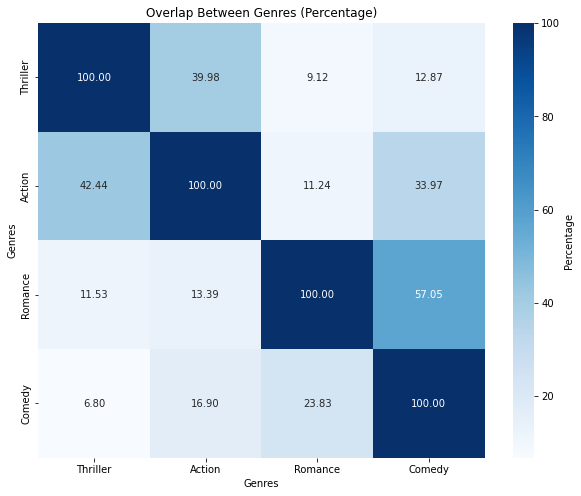

In [17]:
# Filter movies for specific genres
thriller = df[df['genres'].str.contains('thriller')]
action = df[df['genres'].str.contains('action')]
romance = df[df['genres'].str.contains('romance')]
comedy = df[df['genres'].str.contains('comedy')]

# Calculate percentages of overlap between genres
genre_percentages = pd.DataFrame(index=['Thriller', 'Action', 'Romance', 'Comedy'], columns=['Thriller', 'Action', 'Romance', 'Comedy'])

# Function to calculate the percentage of overlap between genres
def calculate_percentage(genre1_df, genre2_df):
    total_genre1_movies = len(genre1_df)
    overlap_count = len(pd.merge(genre1_df, genre2_df, how='inner'))
    if total_genre1_movies > 0:
        percentage = (overlap_count / total_genre1_movies) * 100
    else:
        percentage = 0
    return percentage

# Iterate over each pair of genres and calculate the percentage of overlap
for genre1 in ['Thriller', 'Action', 'Romance', 'Comedy']:
    for genre2 in ['Thriller', 'Action', 'Romance', 'Comedy']:
        genre_percentages.loc[genre1, genre2] = calculate_percentage(eval(genre1.lower()), eval(genre2.lower()))

genre_percentages.fillna(0, inplace=True)
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(genre_percentages, annot=True, cmap='Blues', fmt='.2f', cbar_kws={'label': 'Percentage'})
plt.title('Overlap Between Genres (Percentage)')
plt.xlabel('Genres')
plt.ylabel('Genres')
plt.show()

The heatmap above shows how likely a film or show on Netflix is to have two of the genres above together in its 'genres' list. This provides interesting insights about what genres typically go together and which ones are less likely to be combined. As you can see, the comedy and thriller genres are the least likely to be combined. You can also see there is a difference in a comedy also being a thriller versus a thriller also being a comedy. This is because this plot compares the percentage of movies and shows within a genre that have the second genre name in it. This is different for comedy and thriller because they both have different numbers films and shows with their label. This can make the percentage different due to a different total number of movies and shows.

This example about comedies and thrillers applies to all genres (the percentage of action movies containing the romance label is also different from the percentage of romance movies that have action labels, etc.)

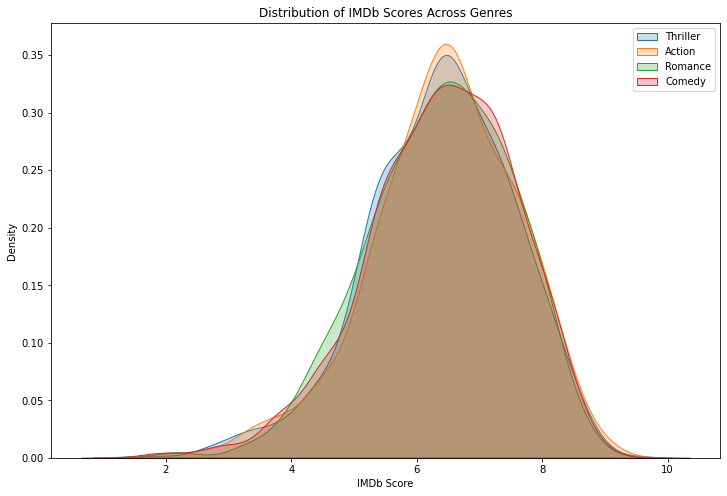

In [19]:
# Plot the IMDb scores for each genre
plt.figure(figsize=(12, 8))
sns.kdeplot(thriller['imdb_score'], label='Thriller', shade=True)
sns.kdeplot(action['imdb_score'], label='Action', shade=True)
sns.kdeplot(romance['imdb_score'], label='Romance', shade=True)
sns.kdeplot(comedy['imdb_score'], label='Comedy', shade=True)
plt.title('Distribution of IMDb Scores Across Genres')
plt.xlabel('IMDb Score')
plt.ylabel('Density')
plt.legend()
plt.show()

The visualization above shows the imdb scores of the four different chosen genres (thriller, action, romance, comedy) as histograms. This allows you to see the distribution of imdb scores for each genre, and compare the different average scores for each genre. Each of these scores has relatively similar average scores and symmetric distributions but slightly skewed left, with action's histogram having the highest peak.